# VERI MADENCILIGI VIZE RAPORU
# Setra Genyang WICANA - 131180400

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as sst
from IPython.display import display, Math, Latex
from sklearn.model_selection import train_test_split

## K-NN Algorithm

assigning dataset

In [2]:
training = pd.read_csv("C:/Users/CycloPC/Documents/datamining/training.csv", sep=",")
test = pd.read_csv("C:/Users/CycloPC/Documents/datamining/datatest.csv", sep=",", usecols=[1,2,3,4,5,6])
test2 = pd.read_csv("C:/Users/CycloPC/Documents/datamining/datatest2.csv", sep=",")
training.drop(['date','id'], axis=1, inplace=True)
test2.drop(['date','id'], axis=1, inplace=True)

print(test.head())

training = training.reindex(np.random.permutation(training.index))
test = test.reindex(np.random.permutation(test.index))
test2 = test2.reindex(np.random.permutation(test2.index))

   Temperature  Humidity       Light         CO2  HumidityRatio  Occupancy
0      23.7000    26.272  585.200000  749.200000       0.004764          1
1      23.7180    26.290  578.400000  760.400000       0.004773          1
2      23.7300    26.230  572.666667  769.666667       0.004765          1
3      23.7225    26.125  493.750000  774.750000       0.004744          1
4      23.7540    26.200  488.600000  779.000000       0.004767          1


In [3]:
#### bundan sonra sadece training ve dataset2 kullanacagiz

because the scale of data inbetween dataset is too various, one row can be too big for the others. So,
we do feature scaling to limit values. In here, we use feature scaling in statistical or minmaxscaler in sklearn. 
We set the range between [0,1] because this is the standard. After that, we draw the scatter plot between all feature [1].

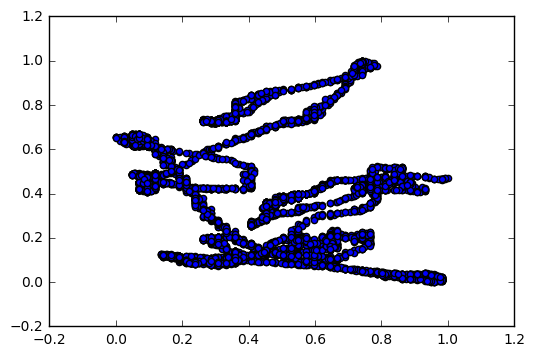

In [4]:
x_train0 = training.iloc[:,0:5]
y_train = training['Occupancy']

x_test0 = test2.iloc[:,0:5]
y_test=test2['Occupancy']

scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train0)
x_test = scaler.fit_transform(x_test0)

plt.scatter(x_train[:,0],x_train[:,1])

We then tried to check skewedness of every feature in element. In probability theory and statistics, skewness is a measure 
of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can 
be positive or negative, or even undefined [2,3]. A good data skew is not more than +2/-2. We observe that some of our data 
have skewedness for over +2, so we apply square root to dataset. Actually, there exist more efficient and better giving result
method which is cox-box [4]. but for no apparent reason, cox-box is not working.

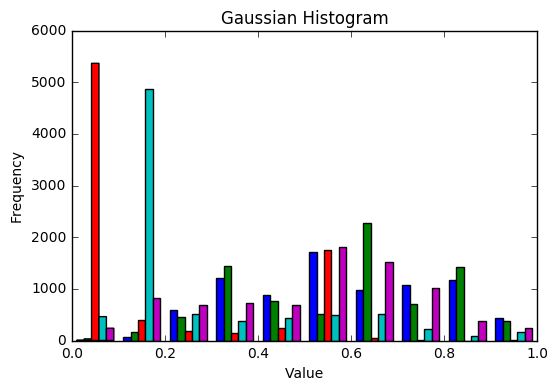

before skewness [-0.06754188 -0.2341887   0.98456623  1.49284922 -0.24926809]
applying log to skewed data [-0.42846926 -0.58597389  0.77536993  1.12259734 -0.72956431]


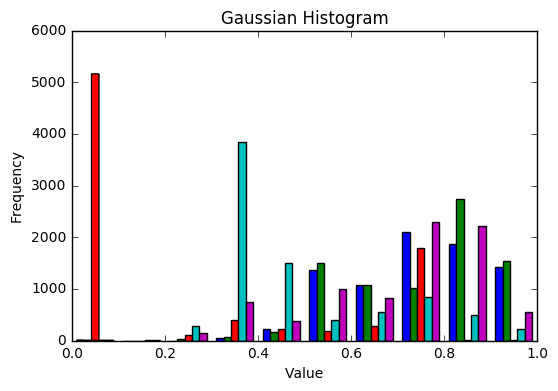

In [24]:
xt = x_train
plt.hist(x_train)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

print("before skewness",sst.skew(x_train))

x_train = np.sqrt(x_train)
print("applying log to skewed data",sst.skew(x_train))
plt.hist(x_train)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

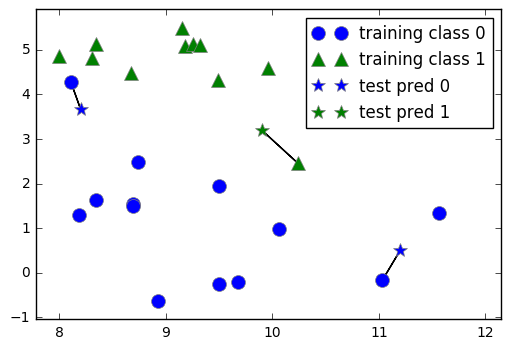

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

train the model with training dataset and try to predict accuracy in test2 dataset

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(x_train, y_train)

In [8]:
xx = pd.DataFrame(x_test)
yy = pd.DataFrame(y_test)

print(xx.shape)
print(yy.shape)

print("Test set predictions: {}".format(clf.predict(xx)))
print("Test set accuracy: {:.2f}".format(clf.score(xx, yy)))

(9752, 5)
(9752, 1)
Test set predictions: [0 0 0 ..., 0 0 0]
Test set accuracy: 0.83


drawing k-neighbor classifier using different **n_neighbors** parametre value starting from 1 to 100. We use auto parametre
to decide most appropriate algorithm based on fit method. Apparently, result shows that neither training line nor test line
converge/diverge. This result show overfitting of a model [5]. THe result can be happen maybe because 1) too much feature (most likely)
2) small dataset 3) Rich hypothesis space 4) Noise in data (not possible) [6].

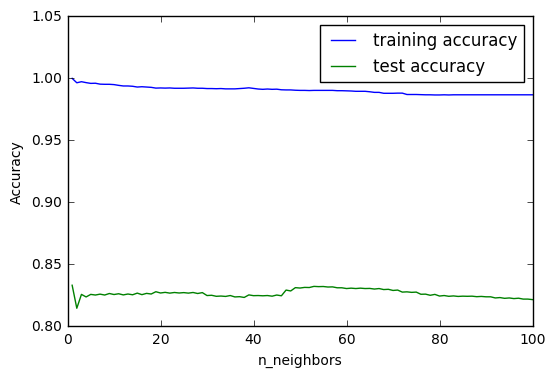

In [9]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 100.
neighbors_settings = range(1, 101)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm='auto')
    clf=clf.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## LOGR

re-assessing dataset, same process as in previous part

In [10]:
from sklearn.linear_model import LogisticRegression

training = pd.read_csv("C:/Users/CycloPC/Documents/datamining/training.csv", sep=",")
test2 = pd.read_csv("C:/Users/CycloPC/Documents/datamining/datatest2.csv", sep=",")
training.drop(['date','id'], axis=1, inplace=True)
test2.drop(['date','id'], axis=1, inplace=True)

training = training.reindex(np.random.permutation(training.index))

x_train0 = training.iloc[:,0:5]
y_train = training['Occupancy']

print(x_train0.head())

x_test0 = test2.iloc[:,0:5]
y_test=test2['Occupancy']

scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train0)
scaler = MinMaxScaler(feature_range=(0, 1))
x_test = scaler.fit_transform(x_test0)

      Temperature  Humidity       Light         CO2  HumidityRatio
3888       21.890   18.2000  327.000000  459.666667       0.002949
5538       20.675   26.4175  151.000000  426.600000       0.003979
8078       20.290   33.2000    0.000000  451.500000       0.004891
908        21.500   24.3900  457.333333  782.333333       0.003864
5026       19.290   31.6000    0.000000  433.500000       0.004371


individual model training for logistic regression.

the important parameter in LogR is C value, maximum iteration and solver tpye. C is Inverse of regularization strength; 
must be a positive float. Like in support vector machines, smaller values specify stronger regularization. Solver are multiple implementation of logistic regression solving. In here, we used netwon-cg as a solver. The reason is because netwon-cg are able to converge faster for high dimensional data rather than liblinear [9]. Finally, max_iter is upper limit 
of solver iteration to converge.

In [11]:
logr = LogisticRegression(C=1, penalty='l2', max_iter=300, solver='newton-cg')
logr.fit(x_train, y_train)

print("Test set predictions: {}".format(logr.predict(xx)))
print("Test set accuracy: {:.2f}".format(logr.score(x_test, y_test)))

Test set predictions: [1 1 0 ..., 1 0 0]
Test set accuracy: 0.99


we can understand from the graph that the good value of C in logistic regression is around 1-3. An the higher the C value,
the lower accuracy will be

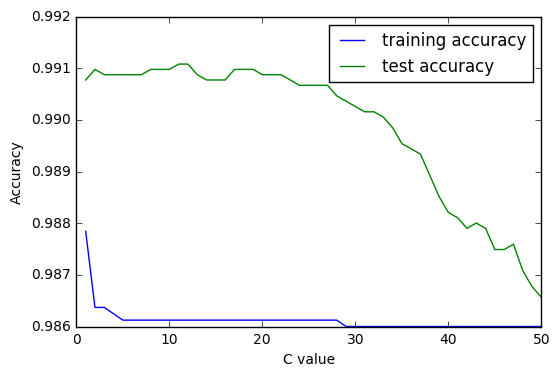

In [12]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 50.
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # build the model
    logr = LogisticRegression(C=n_neighbors, penalty='l2', max_iter=300, solver='newton-cg')
    logr = logr.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(logr.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(logr.score(x_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C value")
plt.legend()

## Support Vector Classifier

re-assessing the dataset

In [13]:
training = pd.read_csv("C:/Users/CycloPC/Documents/datamining/training.csv", sep=",")
test2 = pd.read_csv("C:/Users/CycloPC/Documents/datamining/datatest2.csv", sep=",")
training.drop(['date','id'], axis=1, inplace=True)
test2.drop(['date','id'], axis=1, inplace=True)

training = training.reindex(np.random.permutation(training.index))

x_train0 = training.iloc[:,0:5]
y_train = training['Occupancy']

x_test0 = test2.iloc[:,0:5]
y_test=test2['Occupancy']

scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train0)
x_test = scaler.fit_transform(x_test0)

individual model training for logistic regression.

In [14]:
from sklearn.svm import SVC

c=1
svm = SVC(kernel='rbf', C=10, gamma=0.1)
svm = svm.fit(x_train, y_train)

print("Test set predictions: {}".format(svm.predict(xx)))
print("Test set accuracy: {:.2f}".format(svm.score(x_test, y_test)))

Test set predictions: [1 1 0 ..., 1 0 0]
Test set accuracy: 0.96


the important parameter in SVC is C value and type of kernel used. Alpaydin state that C, as in any regularization scheme, is properly chosen. If it is too large, overfitting may occur. If it is too small, 
we may have underfitting [7]. Meanwhile, kernel must be choosen according to our domain understanding and dataset characteristics [8].
We use rbf as our kernel because can nonlinearly maps samples into a higher dimensional space to it, which can handle the case when
the relational between class labels and attirbutes is non linear [10]. The RBF kernel mathematical representation as follows:
$$K(X_{i},{X_{j}})=exp(-\gamma \left \| X_{i}-X_{j} \right \|^{2}), \gamma >0)$$

Result: optimal C value is between 1-5

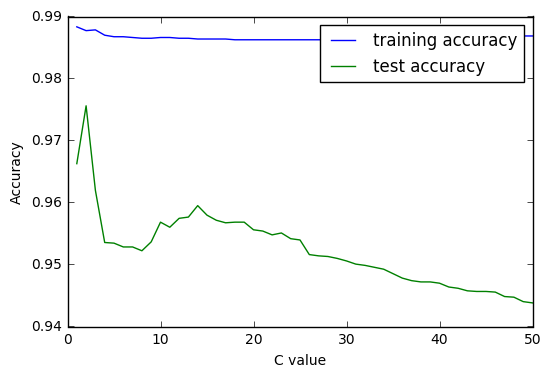

In [15]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 51)

for n_neighbors in neighbors_settings:
    # build the model
    svm = SVC(kernel='rbf', C=n_neighbors, gamma=0.1)
    svm = svm.fit(x_train, y_train)
    
    training_accuracy.append(svm.score(x_train, y_train))
    
    test_accuracy.append(svm.score(x_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C value")
plt.legend()

## Neural Network

Neural network have both unsupervised and supervised method. In this part, we use supervised neural network or multi-player 
perceptron as in sklearn. The hyperparameters in neural network are so complex, it's difficult to explain in detail. 
But in short, important parameters of neural network is number of hidden layer, solver, learning rate, activation sparsify
weight initialization and  number of training iterations [11].

Test set predictions: [0 0 0 ..., 0 0 0]
Test set accuracy: 0.79


C:\Anaconda3\lib\site-packages\mglearn\plot_helpers.py:95: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s,


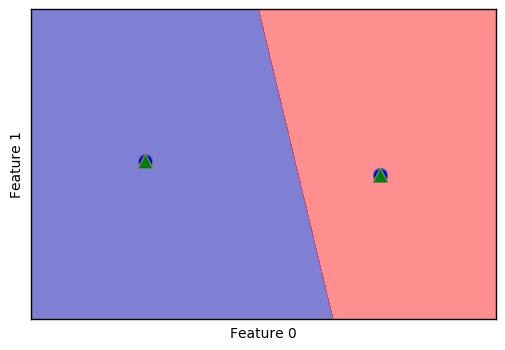

In [16]:
from sklearn.neural_network import MLPClassifier

train_x =x_train[:, 0:2]
test_x = x_test[:, 0:2]

model = MLPClassifier(hidden_layer_sizes=5, solver='sgd',alpha = 0.001, max_iter=500, shuffle=True)
model = model.fit(train_x, y_train)

print("Test set predictions: {}".format(model.predict(test_x)))
print("Test set accuracy: {:.2f}".format(model.score(test_x, y_test)))


mglearn.plots.plot_2d_separator(model, train_x, fill=True, alpha=.5)
mglearn.discrete_scatter(train_x[:, 0], x_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


## Decision Tree

re-assessing dataset, same process as in previous part

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image

training = pd.read_csv("C:/Users/CycloPC/Documents/datamining/training.csv", sep=",")
test2 = pd.read_csv("C:/Users/CycloPC/Documents/datamining/datatest2.csv", sep=",")
training.drop(['date','id'], axis=1, inplace=True)
test2.drop(['date','id'], axis=1, inplace=True)

training = training.reindex(np.random.permutation(training.index))

x_train0 = training.iloc[:,0:5]
y_train = training['Occupancy']

x_test0 = test2.iloc[:,0:5]
y_test=test2['Occupancy']

scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train0)
x_test = scaler.fit_transform(x_test0)

one of the most important parameter in decision tree is the number of features to be splitted (max_features), maximum depth
of tree (max_depth) and maximum leaf total (max_leaf_node). There are various implementation of decision tree, one of mostly used
is CART (Classification and Regression Tree) which i oftenly saw many researcher used it to do semantic analysis in Amazon or 
Twitter Dataset. The difference between C4.5 and CART is employment of Gini index as binomial variance. Also, CART employ 
10-fold cross validatio, whereas C4.5 use heuristic formula to estimate error rates [12]. 
In the model below, optimised CART algorithm are used.

In [18]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier(max_depth=3, random_state=0)
dtc = dtc.fit(x_train, y_train)

print("Test set predictions: {}".format(dtc.predict(x_train)))
print("Accuracy on test set: {:.3f}".format(dtc.score(x_test, y_test)))

Test set predictions: [0 0 0 ..., 1 0 0]
Accuracy on test set: 0.992


In [19]:
export_graphviz(dtc, out_file="tree.dot", class_names=["person var", "person yok"])

In [20]:
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

NameError: name 'graphviz' is not defined

althought graphviz had been installed using various method(pip, conda and .msi installation), it still made unsolvable error.

## Random Forest

re-assessing dataset, same process as in previous part

In [21]:
training = pd.read_csv("C:/Users/CycloPC/Documents/datamining/training.csv", sep=",")
test2 = pd.read_csv("C:/Users/CycloPC/Documents/datamining/datatest2.csv", sep=",")
training.drop(['date','id'], axis=1, inplace=True)
test2.drop(['date','id'], axis=1, inplace=True)

training = training.reindex(np.random.permutation(training.index))
test2 = training.reindex(np.random.permutation(training.index))

x_train0 = training.iloc[:,0:5]
y_train = training['Occupancy']

x_test0 = test2.iloc[:,0:5]
y_test=test2['Occupancy']

scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train0)
x_test = scaler.fit_transform(x_test0)

the main parameters that we have to adjusts in RandomTreeClassifier is **n_estimators** and **max_features.**. 
The former is the number of trees in the forest. The larger the better, but also the longer it will take to compute. in 
addition, note that results will stop getting significantly better beyond a critical number of trees. The latter is the size
of the random subsets of features to consider when splitting a node. The lower the greater the reduction of variance, but 
also the greater the increase in bias [13]. 

In [22]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

rf = RandomForestClassifier(max_depth=4, random_state=0)
rf = rf.fit(x_train, y_train)

print("Test set predictions: {}".format(rf.predict(x_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(x_test, y_test)))

Test set predictions: [0 1 1 ..., 0 0 0]
Accuracy on test set: 0.990


## References

[1] 	P. Juszczak, D. Tax and R. Duin, "Feature scaling in support vector data description," in Proc. ASCI 2002, 8th Annual Conf. of the Advanced School for Computing and Imaging, 2002. 

[2] 	P. T. von Hippel, "Mean, Median, and Skew: Correcting a Textbook Rule," Journal of Statistics Education, vol. 13, no. 2, 2005. 

[3] 	D. Doane and E. L. Seward, "Measuring Skewness: A Forgotten Statistic?," Journal of Statistics Education, vol. 19, no. 2, 2011. 

[4] 	R. M. Sakia, "The Box-Cox Transformation Technique: A Review," Journal of the Royal Statistical Society. Series D, vol. 41, no. 2, pp. 169-178, 1992. 

[5] 	C. Perlich, "Learning Curves in Machine Learning," in Encyclopedia of Machine Learning, Springer, 2011, pp. 577-580.

[6] 	M. E. Karslıgil, "Y.T.Ü. Bilgisayar Mühendisliği Bölümü Web Sitesi," [Online]. Available: https://www.ce.yildiz.edu.tr/personal/elifk/. [Accessed 25 11 2016].

[7] 	E. ALPAYDIN, Introduction to Machine Learning, Istanbul: The MIT Press, 2004. 

[8] 	G. C. Cawley and N. L. C. Talbot, "Preventing Over-Fitting during Model Selection via Bayesian Regularisation of the Hyper-Parameters," The Journal of Machine Learning Research , vol. 9, pp. 841-861 , 2007. 

[9] 	C. M. Bishop, Pattern Recognition and Machine Learning, Springer, 2007. 

[10] 	C.-C. C. a. C.-J. L. Chih-Wei Hsu, "A Practical Guide to Support Vector Classification," National Taiwan University, Taiwan, 2010.

[11] 	Y. Bengio and U. Montreal, "ractical Recommendations for Gradient-Based Training of Deep Architectures," in Neural Networks: Tricks of the Trade, Springer, 2012, pp. 437-478.

[12] 	W.-Y. Loh, "Classification and regression trees," John Wiley & Sons, Inc, 2011.

[13] 	A. Liaw and M. Wiener, "Classification and Regression by RandomForest," R News, vol. 2, no. 3, pp. 18-22, 2002. 

